## 1. file contents

### columns

In [403]:
import pandas as pd

In [404]:
data_gender=pd.read_csv("../data/titanic/gender_submission.csv")
display(data_gender.head(5))
display(data_gender.tail(5))

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [405]:
test_data=pd.read_csv("../data/titanic/test.csv")
display(test_data.head(2))
display(test_data.tail(2))
train_data=pd.read_csv("../data/titanic/train.csv")
display(train_data.head(2))
display(train_data.tail(2))

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Initially, the data was divided into training and test databases for the first steps in ml

### data type

In [406]:
print("Shape of data_gender\t",data_gender.shape)
display(data_gender.info())

Shape of data_gender	 (418, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


None

In [407]:
print("Shape of test_data\t",test_data.shape)
display(test_data.info());

Shape of test_data	 (418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


None

In [408]:
print("Shape of train_data\t",train_data.shape)
display(train_data.info());

Shape of train_data	 (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

1. The test and training data contains empty data that needs to be transformed
2. Since the train and test data have object dtypes, we need to determine how to handle them

### pre-processing

Now we need to understand where the null values are located and how to replace it

In [409]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [410]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The .isnull() function does not give us a clear idea of the column, it allows us to respond only to Nun values\
That's why we need to visualize the data

However, we need third-party data on the layout of the cabins, for a clearer understanding

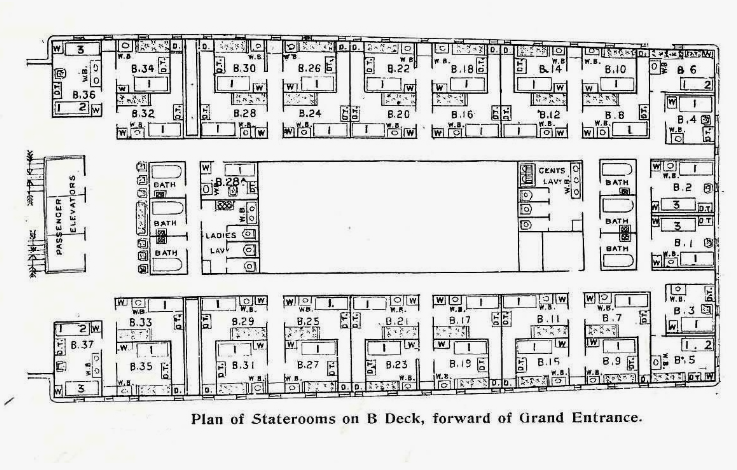

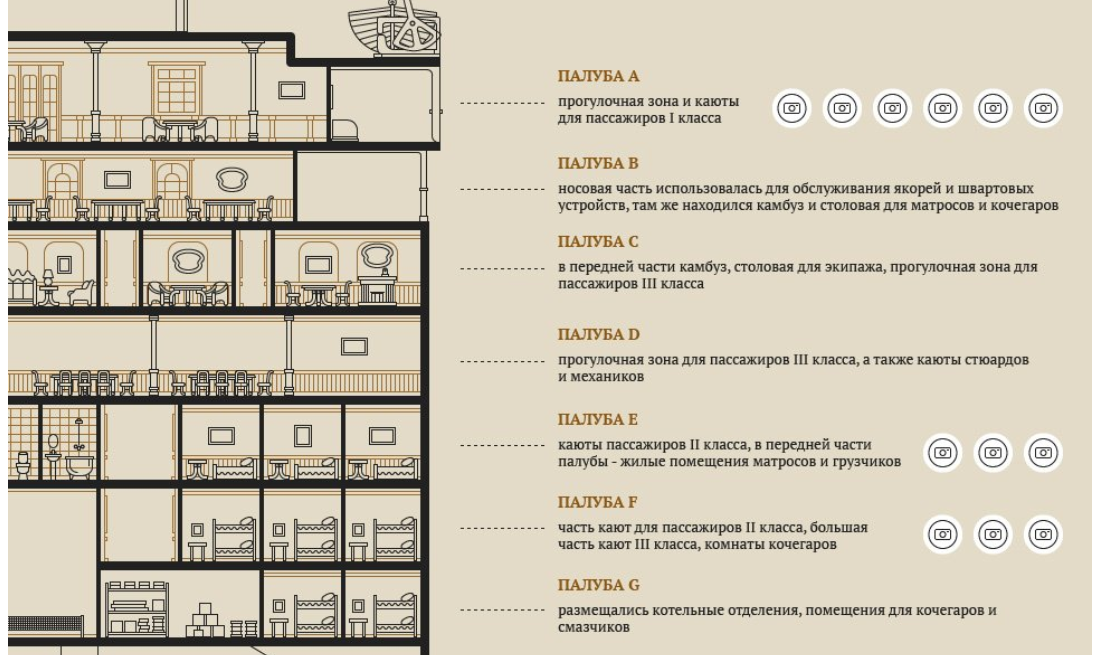

In [411]:
import matplotlib.pyplot as plt
import seaborn as sns

In [412]:
#First, we create dictionaries of the most frequent values with types
#Shape of data
print("Shape of data ",train_data.shape)
#Most freauent values
for col in train_data.columns: print(train_data[col].value_counts())
#Dictionaries
dict_freq = {}
for col in train_data.columns:
    dict_freq[col] = {
        'value_counts': train_data[col].value_counts(),
        'dtype': train_data[col].dtype
    }

Shape of data  (891, 12)
PassengerId
1      1
2      1
3      1
4      1
5      1
      ..
887    1
888    1
889    1
890    1
891    1
Name: count, Length: 891, dtype: int64
Survived
0    549
1    342
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Name
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
Allen, Mr. William Henry                               1
                                                      ..
Montvila, Rev. Juozas                                  1
Graham, Miss. Margaret Edith                           1
Johnston, Miss. Catherine Helen "Carrie"               1
Behr, Mr. Karl Howell                                  1
Dooley, Mr. Patrick                                    1
Name: count, Length: 891, dtype: int64
Sex
male      577
female    314
Name: cou

In [413]:
#Set of types
print("Set of dtypes: ",set([dict_freq[i]['dtype'] for i in dict_freq])) #type "O" - object

Set of dtypes:  {dtype('O'), dtype('int64'), dtype('float64')}


Then we display the numeric objects on the boxplot -> histogram -> violin

### visualization

The passenger ID was deleted due to its lack of informativeness

In [414]:
train_data = train_data.drop("PassengerId",axis=1)

In [415]:
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


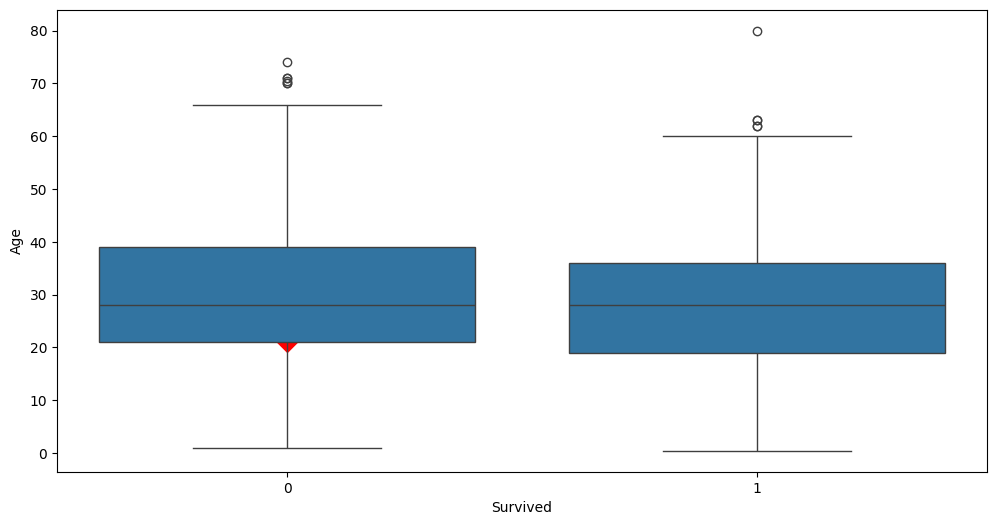

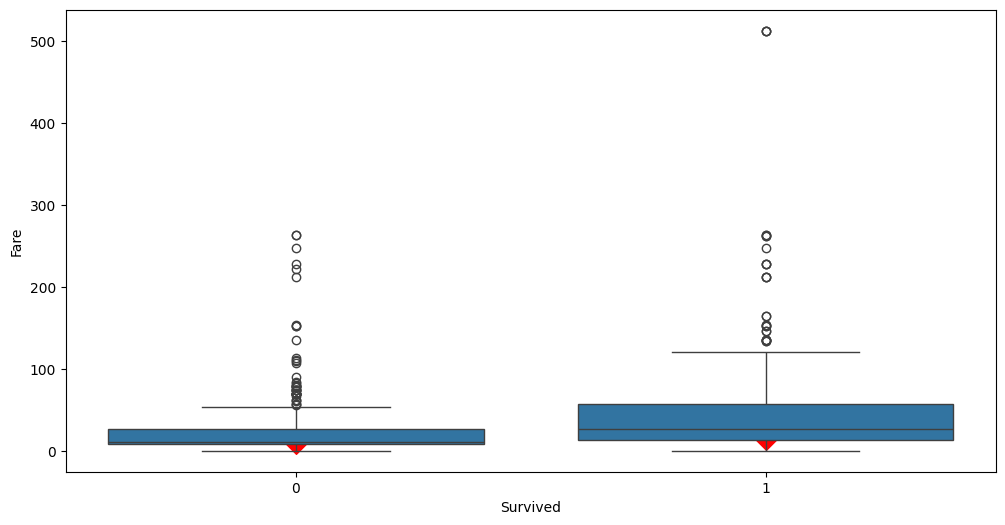

In [416]:
for col in train_data:
    if str(train_data[col].dtype) in ['int64','float64'] and train_data[col].nunique() > 20:
        mode = train_data[col].mode()[0]
        plt.figure(figsize=(12, 6))
        sns.boxplot(
            data=train_data,
            x='Survived',
            y=col
        )
        modes = train_data.groupby('Survived')[col].apply(lambda x: x.mode()[0])
        for surv_value, mode_val in modes.items():
            plt.scatter(surv_value, mode_val, color='red', s=100, marker='D')
        plt.show()

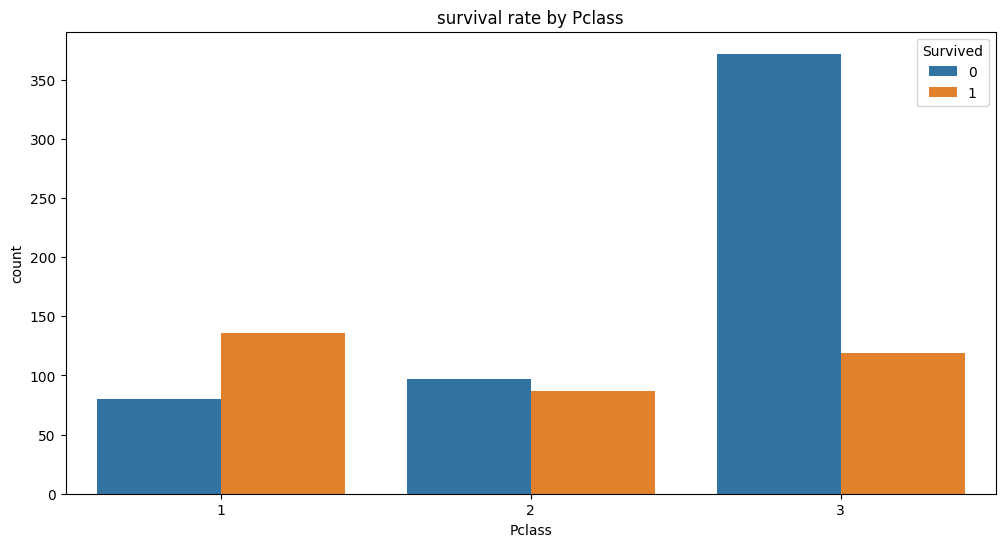

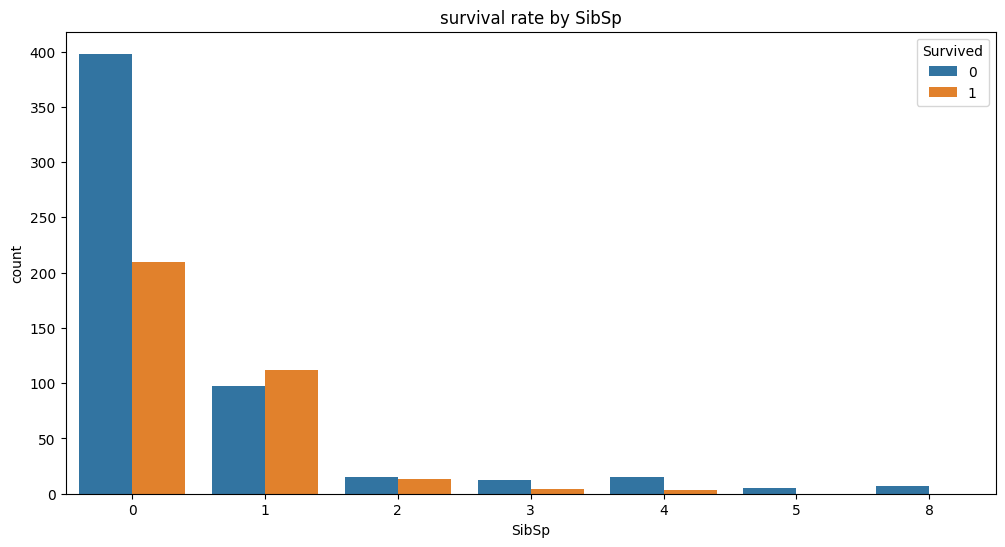

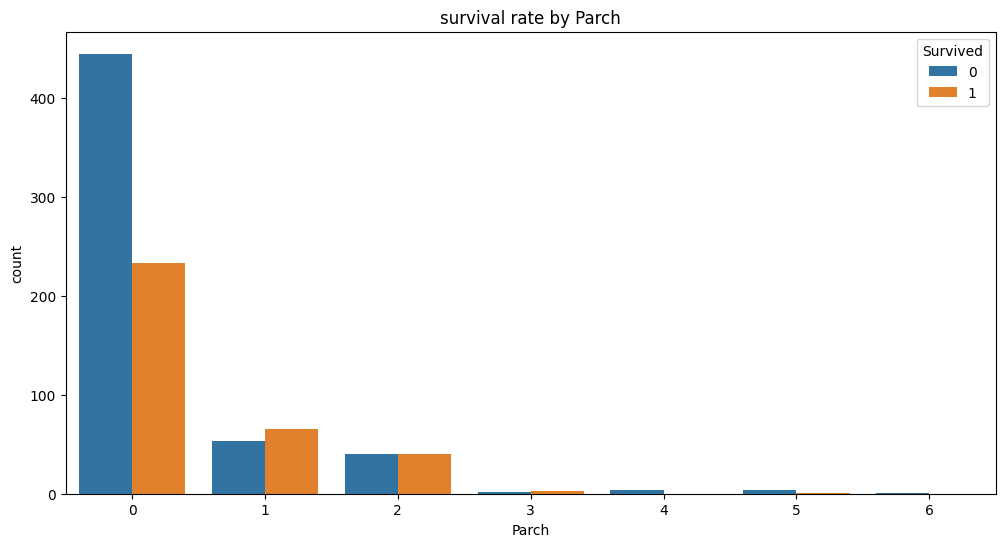

In [417]:
for col in train_data:
    if str(train_data[col].dtype) in ['int64','float64'] and train_data[col].nunique() < 20 and col != "Survived":
        plt.figure(figsize=(12, 6))
        sns.countplot(data=train_data, x=col, hue='Survived')
        plt.title(f'survival rate by {col}')
        plt.show()

In [418]:
dict_freq_num = {}
for col in train_data.columns:
    dict_freq_num[col] = {
        'value_counts': train_data[col].nunique(),
        'dtype': train_data[col].dtype
    }
dict_freq_num 

{'Survived': {'value_counts': 2, 'dtype': dtype('int64')},
 'Pclass': {'value_counts': 3, 'dtype': dtype('int64')},
 'Name': {'value_counts': 891, 'dtype': dtype('O')},
 'Sex': {'value_counts': 2, 'dtype': dtype('O')},
 'Age': {'value_counts': 88, 'dtype': dtype('float64')},
 'SibSp': {'value_counts': 7, 'dtype': dtype('int64')},
 'Parch': {'value_counts': 7, 'dtype': dtype('int64')},
 'Ticket': {'value_counts': 681, 'dtype': dtype('O')},
 'Fare': {'value_counts': 248, 'dtype': dtype('float64')},
 'Cabin': {'value_counts': 147, 'dtype': dtype('O')},
 'Embarked': {'value_counts': 3, 'dtype': dtype('O')}}

### filling values

In [419]:
#Since there are many unique values for age, as well as omissions, they should be grouped based on class and gender
train_data['Age'].fillna(train_data.groupby(['Pclass','Sex'])['Age'].transform('median'), inplace=True)

In [420]:
train_data.isnull().sum()['Age']

np.int64(0)

In [421]:
train_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [422]:
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

In [423]:
#since there are many cabins, it is easier to create a sign that there is a booth or not
train_data['Cabin'].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

### making features

sibsp	# of siblings / spouses aboard the Titanic\
parch	# of parents / children aboard the Titanic

In [424]:
#First, let's try with a sign that means that there are relatives in general
train_data['Any_relatives'] = ((train_data['SibSp'] > 0) | (train_data['Parch'] > 0)).astype(int)

The cabins provides a lot of information.\
If the number is higher, it is closer to the stairs and boats.\
 If there are several numbers and there are relatives, you need to see if both numbers are in the right section

In [425]:
import re

In [426]:
#deck
train_data['Deck'] = train_data['Cabin'].str[0].fillna('U')
#groups of deck
deck_groups = {
    1: ['A', 'B', 'C'],
    2: ['D', 'E'],
    3: ['F', 'G', 'T']
}
for group, decks in deck_groups.items():
    train_data[f'Deck_{group}'] = train_data['Deck'].isin(decks).astype(int)
#extract numbers
def extract_numbers(cabin):
    if pd.isna(cabin):
        return []
    return [int(x) for x in re.findall(r'\d+', cabin)]
train_data['CabinNumbers'] = train_data['Cabin'].apply(extract_numbers)

In [427]:
#if the list is empty, then 0. if 1 booth - immediately into the numbers, if not at all - the average
def compute_cabin_value(numbers):
    if len(numbers) == 0:
        return 0
    elif len(numbers) == 1:
        return numbers[0]
    else:
        return sum(numbers) / len(numbers)
train_data['CabinValue'] = train_data['CabinNumbers'].apply(compute_cabin_value)

In [428]:
#we are looking for which category the cabin belongs to
def cabin_zone(value):
    if value == 0:
        return 0
    elif value < 20:
        return 1
    elif value < 50:
        return 2
    elif value < 100:
        return 3
    else:
        return 4
train_data['CabinZone'] = train_data['CabinValue'].apply(cabin_zone)

In [429]:
train_data = train_data.drop(['SibSp','Parch','Cabin','Deck','CabinNumbers','CabinValue','Ticket'],axis=1)

In [430]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    int64  
 1   Pclass         891 non-null    int64  
 2   Name           891 non-null    object 
 3   Sex            891 non-null    object 
 4   Age            891 non-null    float64
 5   Fare           891 non-null    float64
 6   Embarked       891 non-null    object 
 7   Any_relatives  891 non-null    int64  
 8   Deck_1         891 non-null    int64  
 9   Deck_2         891 non-null    int64  
 10  Deck_3         891 non-null    int64  
 11  CabinZone      891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [431]:
train_data['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [439]:
def extract_title(name):
    match = re.search(r' ([A-Za-z]+)\.', name)
    if match:
        return match.group(1)
    return 'Unknown'
train_data['Title'] = train_data['Name'].apply(extract_title)
title_mapping = {
    'Mme': 'Mrs',
    'Mlle': 'Miss',
    'Ms': 'Miss'
}
train_data['Title'] = train_data['Title'].replace(title_mapping)
common_titles = ['Mr', 'Mrs', 'Miss', 'Master']
train_data['Title'] = train_data['Title'].apply(lambda x: x if x in common_titles else 'Rare')

In [440]:
train_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

### preparing the distribution

Check if continuous and discrete features follow a normal distribution or not

### dave data for learning.file